In [152]:
from numpy import exp, array, random, dot, arange
import numpy as np
import matplotlib.pyplot as plt

class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1

class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

    def print_weights(self):
        print ("Layer 1")
        print (self.layer1.synaptic_weights)
        print()
        print ("Layer 2")
        print (self.layer2.synaptic_weights)
        print()

if __name__ == "__main__":

    random.seed(1)

    layer1 = NeuronLayer(3, 3)

    layer2 = NeuronLayer(1, 3)

    neural_network = NeuralNetwork(layer1, layer2)

    print ("Random Initial Weights : ")
    neural_network.print_weights()

    training_set_inputs = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
    training_set_outputs = array([[0, 1, 1, 1, 1, 0, 0]]).T

    neural_network.train(training_set_inputs, training_set_outputs, 60000)

    print ("Weights after training : ")
    neural_network.print_weights()

Random Initial Weights : 
Layer 1
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]]

Layer 2
[[ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]]

Weights after training : 
Layer 1
[[ -1.21029530e+01   5.81964149e+00  -1.04892674e+00]
 [  5.84411119e+00  -1.21099946e+01  -1.04887516e+00]
 [ -5.46350726e-01  -5.15682391e-01  -3.67987905e-03]]

Layer 2
[[ 13.61907334]
 [ 13.61898984]
 [-35.02678959]]



In [150]:
# Test the neural network with a new situation.
print ("[1, 1, 0] -> ")
hidden_state, output = neural_network.think(array([1, 1, 0]))
print (output)

[1, 1, 0] -> 
[ 0.54165702]


In [53]:
print(hidden_state)

[  8.13364930e-10   3.72251218e-03]


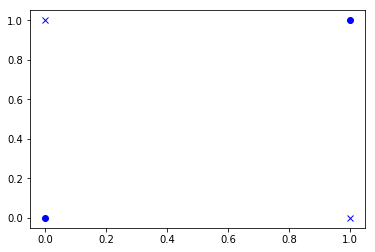

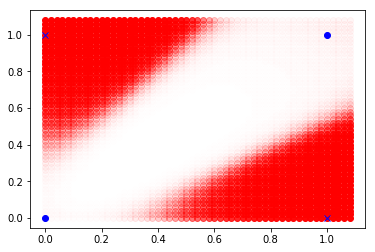

In [153]:
plt.plot(0,0,'bo')
plt.plot(0,1,'bx')
plt.plot(1,0,'bx')
plt.plot(1,1,'bo')
plt.show()
t = np.arange(0., 1.1, 0.02)
result = []
for i in t:
    for j in t:
        x=(neural_network.think(array([i, j, 0]))[1].tolist()[0])
        plt.plot(i,j,'ro',alpha=x)

plt.plot(0,0,'bo')
plt.plot(0,1,'bx')
plt.plot(1,0,'bx')
plt.plot(1,1,'bo')
plt.show()